# CR_Score Playbook 02: Feature Selection

**Level:** Intermediate  
**Time:** 15-20 minutes  
**Goal:** Master model-agnostic feature selection methods

## What You'll Learn

- Forward selection (greedy addition)
- Backward elimination (greedy removal)
- Stepwise selection (bidirectional)
- Exhaustive search (all combinations)
- MLflow experiment tracking
- Compare results across methods

## Prerequisites

- Completed Playbook 01
- MLflow installed: `pip install mlflow`

## Step 1: Setup

In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / 'src'))

from cr_score.model import LogisticScorecard
from cr_score.features import ForwardSelector, BackwardSelector, StepwiseSelector

print("[OK] Libraries imported!")

[OK] Libraries imported!


In [2]:
# Load data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Separate features and target
# NOTE: For this tutorial, we'll only use NUMERIC features
# In practice, you'd encode categorical features first
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
feature_cols = [col for col in numeric_cols 
                if col not in ['application_id', 'default']]

X_train = train_df[feature_cols]
y_train = train_df['default']
X_test = test_df[feature_cols]
y_test = test_df['default']

print(f"Training data: {len(X_train)} samples, {len(feature_cols)} numeric features")
print(f"Features: {feature_cols}")
print(f"Test data: {len(X_test)} samples")

Training data: 3500 samples, 10 numeric features
Features: ['age', 'income', 'employment_years', 'credit_history_years', 'num_credit_lines', 'debt_to_income_ratio', 'credit_utilization', 'num_recent_inquiries', 'num_delinquent_accounts', 'loan_amount']
Test data: 1500 samples


## Step 2: Forward Selection

Start with no features, add best one at a time.

In [3]:
# Create estimator (model to use for selection)
# Using CR_Score's LogisticScorecard instead of sklearn's LogisticRegression
estimator = LogisticScorecard(random_state=42)

# Create forward selector
forward = ForwardSelector(
    estimator=estimator,
    max_features=8,
    use_mlflow=False  # Disable MLflow for simplicity
)

# Fit (this will take a minute as it evaluates many feature combinations)
print("Running forward selection... (this may take 1-2 minutes)")
forward.fit(X_train, y_train)

# Get selected features
selected_features = forward.get_selected_features()

print(f"\nForward Selection Results:")
print(f"  Selected {len(selected_features)} features")
print(f"  Features: {selected_features}")
print(f"  Best AUC: {forward.best_score_:.3f}")

Running forward selection... (this may take 1-2 minutes)
{"n_features": 10, "max_features": 8, "scoring": "roc_auc", "event": "Starting forward feature selection", "timestamp": "2026-01-16T10:14:00.795252Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:00.799252Z", "level": "info"}
{"intercept": -7.5984166742411565, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:00.807562Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:00.810617Z", "level": "info"}
{"intercept": -8.072470435139289, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:00.817357Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:00.8199

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 


{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:00.991933Z", "level": "info"}
{"intercept": -4.3451397048110385, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:00.995368Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:00.996655Z", "level": "info"}
{"intercept": -5.065010660490652, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.000143Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.002180Z", "level": "info"}
{"intercept": -4.814781829877245, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.006451Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted"

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"event": "Iteration 1: Added 'age' (score=nan, improvement=nan)", "timestamp": "2026-01-16T10:14:01.180779Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.183333Z", "level": "info"}
{"intercept": -8.01198721249061, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.196963Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.200344Z", "level": "info"}
{"intercept": -8.857247304601358, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.213998Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.216141Z", "level": "info"}
{"intercept": -7.878201596353886, "n_features_used": 2, "event": "Model trai

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.953282423936362, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.374011Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.376016Z", "level": "info"}
{"intercept": -7.631766284834716, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.383994Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.386204Z", "level": "info"}
{"intercept": -6.245062245917092, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.393235Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.395666Z", "level": "info"}
{"intercept": -7.615127020519122, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 


{"intercept": -8.012296517917349, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.560176Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.562175Z", "level": "info"}
{"intercept": -8.154311786749195, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.570739Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.575049Z", "level": "info"}
{"intercept": -7.488064548046333, "n_features_used": 2, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.583699Z", "level": "info"}
{"n_samples": 2800, "n_features": 2, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.586104Z", "level": "info"}
{"intercept": -7.900362635199452, "n_features_us

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.751898Z", "level": "info"}
{"intercept": -8.067629208016152, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.771942Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.774015Z", "level": "info"}
{"intercept": -8.561841781046537, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.793757Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.797145Z", "level": "info"}
{"intercept": -9.25388584486332, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.815628Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": f

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.932923Z", "level": "info"}
{"intercept": -9.922170676526411, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:01.969351Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:01.972977Z", "level": "info"}
{"intercept": -7.347817891071102, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.000880Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.002936Z", "level": "info"}
{"intercept": -8.40559307005618, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.026475Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": f

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -8.212455809608803, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.128390Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.130689Z", "level": "info"}
{"intercept": -7.258284501346058, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.146911Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.148966Z", "level": "info"}
{"intercept": -7.6489208766763435, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.167832Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.170385Z", "level": "info"}
{"intercept": -8.426965089852516, "n_features_us

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

{"intercept": -8.208686838473783, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.311770Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.314334Z", "level": "info"}
{"intercept": -8.925706370697942, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.335403Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.337689Z", "level": "info"}
{"intercept": -7.9020170497097615, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.354496Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.357604Z", "level": "info"}
{"intercept": -8.615069095561974, "n_features_us

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.494159Z", "level": "info"}
{"intercept": -8.81289685831398, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.516625Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.519795Z", "level": "info"}
{"intercept": -8.034727964645116, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.535999Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.538000Z", "level": "info"}
{"intercept": -8.765138566562051, "n_features_used": 3, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.553444Z", "level": "info"}
{"n_samples": 2800, "n_features": 3, "weighted": 

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.677291Z", "level": "info"}
{"intercept": -8.552808333335447, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.702833Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.705321Z", "level": "info"}
{"intercept": -9.293878180094866, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.729458Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.731577Z", "level": "info"}
{"intercept": -10.242871713083932, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.763277Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted":

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

{"intercept": -8.409914595213777, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.900029Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.902046Z", "level": "info"}
{"intercept": -8.825248787882423, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.941622Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.945624Z", "level": "info"}
{"intercept": -7.392603849760278, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:02.966218Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:02.968229Z", "level": "info"}
{"intercept": -8.430777352128263, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

{"intercept": -8.417654767626708, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.071956Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.076351Z", "level": "info"}
{"intercept": -7.605145626272602, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.113996Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.115269Z", "level": "info"}
{"intercept": -8.501968568052062, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.144135Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.146134Z", "level": "info"}
{"intercept": -6.6631226511557315, "n_features_us

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.270509Z", "level": "info"}
{"intercept": -9.162224459123765, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.308068Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.310068Z", "level": "info"}
{"intercept": -8.082115006099642, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.338229Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.340392Z", "level": "info"}
{"intercept": -8.807920407544904, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.364004Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted":

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -8.955834049417394, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.466488Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.468497Z", "level": "info"}
{"intercept": -7.794034125347625, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.502588Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.526587Z", "level": "info"}
{"intercept": -8.396917560932668, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.572094Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.574096Z", "level": "info"}
{"intercept": -9.084468717422622, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.664307Z", "level": "info"}
{"intercept": -8.07145680393579, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.692298Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.695001Z", "level": "info"}
{"intercept": -8.44875501763173, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.716750Z", "level": "info"}
{"n_samples": 2800, "n_features": 4, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.717998Z", "level": "info"}
{"intercept": -9.225485338116751, "n_features_used": 4, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.738187Z", "level": "info"}
{"event": "Iteration 4: Added 'credit_history_year

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.880363Z", "level": "info"}
{"intercept": -9.15247819883047, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.924792Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.927790Z", "level": "info"}
{"intercept": -9.829626745688016, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:03.972291Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:03.977405Z", "level": "info"}
{"intercept": -7.736443357769163, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.006835Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": f

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.057204Z", "level": "info"}
{"intercept": -8.440539204536568, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.094684Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.096685Z", "level": "info"}
{"intercept": -9.496565083040434, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.127990Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.130497Z", "level": "info"}
{"intercept": -7.988748482185623, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.177728Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": 

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.259291Z", "level": "info"}
{"intercept": -8.849807890838843, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.308721Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.310733Z", "level": "info"}
{"intercept": -9.935161221811722, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.348112Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.351778Z", "level": "info"}
{"intercept": -8.60545030045335, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.385180Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": 

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -8.571395914135609, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.473391Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.475398Z", "level": "info"}
{"intercept": -9.575277063920055, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.513564Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.515563Z", "level": "info"}
{"intercept": -10.329801590628556, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.554207Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.557215Z", "level": "info"}
{"intercept": -8.26057740820248, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.672195Z", "level": "info"}
{"intercept": -9.11768424291652, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.721729Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.724066Z", "level": "info"}
{"intercept": -10.060705751189285, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.770878Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.774296Z", "level": "info"}
{"intercept": -8.439067115829687, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.804719Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": 

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.879071Z", "level": "info"}
{"intercept": -9.17237340796492, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.908616Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.911039Z", "level": "info"}
{"intercept": -10.213948463868478, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:04.947195Z", "level": "info"}
{"event": "Iteration 5: Added 'num_credit_lines' (score=nan, improvement=nan)", "timestamp": "2026-01-16T10:14:04.948631Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:04.952022Z", "level": "info"}
{"intercept": -7.014709632634708, "n_features_used": 6, "even

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.944873624931834, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.087051Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.089536Z", "level": "info"}
{"intercept": -8.175905905675615, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.133564Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.134571Z", "level": "info"}
{"intercept": -9.057462638759544, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.174935Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.179081Z", "level": "info"}
{"intercept": -5.97681400502352, "n_features_used

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -8.710457159873428, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.311459Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.314470Z", "level": "info"}
{"intercept": -7.028140296530138, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.377597Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.379905Z", "level": "info"}
{"intercept": -8.700557738460867, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.459007Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.462358Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -9.498390040137124, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.531773Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.535177Z", "level": "info"}
{"intercept": -7.954417277156389, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.691531Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.693533Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -9.371691251943194, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.766437Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.768440Z", "level": "info"}
{"intercept": -7.692165813890229, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.829910Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.832922Z", "level": "info"}
{"intercept": -9.429482906189898, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:05.905021Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.908201Z", "level": "info"}
{"intercept": -9.9216278621754, "n_features_used"

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:05.958414Z", "level": "info"}
{"intercept": -7.60561103144781, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.030501Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.032501Z", "level": "info"}
{"intercept": -9.089969175313831, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.146756Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.151145Z", "level": "info"}
{"intercept": -7.427575392705007, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.203776Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.205847Z", "level": "info"}
{"intercept": -8.9607056622543, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.294295Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.296496Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -9.629660849463173, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.385142Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.389257Z", "level": "info"}
{"intercept": -7.780615440991112, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.436453Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.438214Z", "level": "info"}
{"intercept": -9.246879332354052, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.499374Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.502377Z", "level": "info"}
{"intercept": -7.686529390646436, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -9.029342712266834, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.601310Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.603321Z", "level": "info"}
{"intercept": -9.807927308279856, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.646136Z", "level": "info"}
{"event": "Iteration 6: Added 'debt_to_income_ratio' (score=nan, improvement=nan)", "timestamp": "2026-01-16T10:14:06.648368Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.651440Z", "level": "info"}
{"intercept": -6.591036228835742, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.738350Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "F

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -7.944573203076404, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.842831Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.845015Z", "level": "info"}
{"intercept": -6.742810461928491, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.919106Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.920108Z", "level": "info"}
{"intercept": -8.089542182247966, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:06.989997Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:06.992473Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -8.620208542594854, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.097115Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.101022Z", "level": "info"}
{"intercept": -7.137204023045072, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.162285Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.164397Z", "level": "info"}
{"intercept": -8.486584394660634, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.230766Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.233936Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.924198484781596, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.341346Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.343454Z", "level": "info"}
{"intercept": -8.402445225690009, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.421912Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.424420Z", "level": "info"}
{"intercept": -9.108691817942471, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.510287Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.514596Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.869090772011653, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.607562Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.611180Z", "level": "info"}
{"intercept": -8.32642177435722, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.671371Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.673885Z", "level": "info"}
{"intercept": -6.7186463455072305, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.727912Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.730302Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -8.223114371599632, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.853568Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.855855Z", "level": "info"}
{"intercept": -8.816910186879738, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:07.945230Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:07.949233Z", "level": "info"}
{"intercept": -7.026067908152703, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.010236Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.012239Z", "level": "info"}
{"intercept": -8.471314639100411, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.063408Z", "level": "info"}
{"intercept": -6.972548686168534, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.125511Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.126638Z", "level": "info"}
{"intercept": -8.117163048047107, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.173023Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.175401Z", "level": "info"}
{"intercept": -9.050788146991412, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.215272Z", "level": "info"}
{"event": "Iteration 7: Added 'credit_utilizatio

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.740961253170038, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.458600Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.460604Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.959375086021535, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.674353Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.677405Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.794864663382116, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.897949Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.900034Z", "level": "info"}
{"intercept": -6.624730975620599, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:08.975913Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:08.978923Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.566199219668768, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:09.194026Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:09.196509Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.30360189031632, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:09.413091Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:09.415092Z", "level": "info"}
{"intercept": -7.207901979987879, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:09.477796Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:09.480810Z", "level": "info"}
{"intercept": -6.556458060379947, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:09.567143Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:09.569143Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.144508794243179, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:09.697961Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:09.700423Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -8.054149397810077, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:09.919696Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:09.923696Z", "level": "info"}
{"intercept": -6.6048541852148555, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:10.105590Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:10.109166Z", "level": "info"}
{"intercept": -7.924318753946614, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:10.232132Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:10.235419Z", "level": "info"}
{"intercept": -5.667058959181983, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:10.285067Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:10.286421Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -7.969798808872243, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:10.423748Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:10.426671Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

{"intercept": -8.593041035631819, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:10.533199Z", "level": "info"}
{"event": "Iteration 8: Added 'num_recent_inquiries' (score=nan, improvement=nan)", "timestamp": "2026-01-16T10:14:10.535630Z", "level": "info"}
{"event": "Forward selection completed: 8 features selected, best score=nan", "timestamp": "2026-01-16T10:14:10.536629Z", "level": "info"}

Forward Selection Results:
  Selected 8 features
  Features: ['age', 'income', 'employment_years', 'credit_history_years', 'num_credit_lines', 'debt_to_income_ratio', 'credit_utilization', 'num_recent_inquiries']
  Best AUC: nan


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

## Step 3: Backward Elimination

Start with all features, remove worst one at a time.

In [4]:
# Create estimator
estimator = LogisticScorecard(random_state=42)

# Create backward selector
backward = BackwardSelector(
    estimator=estimator,
    min_features=5,
    use_mlflow=False
)

# Fit
print("Running backward elimination... (this may take 1-2 minutes)")
backward.fit(X_train, y_train)

# Get selected features
selected_features = backward.get_selected_features()

print(f"\nBackward Elimination Results:")
print(f"  Selected {len(selected_features)} features")
print(f"  Features: {selected_features}")
print(f"  Best AUC: {backward.best_score_:.3f}")

Running backward elimination... (this may take 1-2 minutes)
{"n_features": 10, "min_features": 5, "event": "Starting backward feature elimination", "timestamp": "2026-01-16T10:14:10.545287Z", "level": "info"}
{"n_samples": 2800, "n_features": 10, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:10.547294Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


{"intercept": -5.064905709162003, "n_features_used": 10, "event": "Model training completed", "timestamp": "2026-01-16T10:14:10.767995Z", "level": "info"}
{"n_samples": 2800, "n_features": 10, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:10.769003Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.413515430297668, "n_features_used": 10, "event": "Model training completed", "timestamp": "2026-01-16T10:14:10.990363Z", "level": "info"}
{"n_samples": 2800, "n_features": 10, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:10.993374Z", "level": "info"}
{"intercept": -5.480663775158239, "n_features_used": 10, "event": "Model training completed", "timestamp": "2026-01-16T10:14:11.204576Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"n_samples": 2800, "n_features": 10, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:11.206581Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.570695157471124, "n_features_used": 10, "event": "Model training completed", "timestamp": "2026-01-16T10:14:11.417649Z", "level": "info"}
{"n_samples": 2800, "n_features": 10, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:11.418650Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.153745858329931, "n_features_used": 10, "event": "Model training completed", "timestamp": "2026-01-16T10:14:11.638246Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:11.642604Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.089805083181372, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:11.840855Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:11.843866Z", "level": "info"}
{"intercept": -6.099856043188203, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:12.053701Z", "level": "info"}

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:12.056707Z", "level": "info"}
{"intercept": -6.209892457407996, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:12.198838Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:12.200843Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.532681419145752, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:12.336260Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:12.338260Z", "level": "info"}
{"intercept": -6.981895196113455, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:12.434214Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:12.437657Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.097942810108506, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:12.654238Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:12.656422Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.696782379498281, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:12.874541Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:12.876609Z", "level": "info"}
{"intercept": -6.013320459158176, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:12.981779Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:12.983780Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.731149252934397, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:13.202991Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:13.205712Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.776097848085419, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:13.421198Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:13.424197Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.188950503020535, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:13.638493Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:13.641008Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.876278198930668, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:13.854119Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:13.855660Z", "level": "info"}
{"intercept": -6.29035936504831, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:14.026692Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:14.030166Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.983339429733828, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:14.147158Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:14.151164Z", "level": "info"}
{"intercept": -7.635628022466913, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:14.356759Z", "level": "info"}

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:14.360887Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.767469629103686, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:14.571881Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:14.572974Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.712030723644178, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:14.777400Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:14.779814Z", "level": "info"}
{"intercept": -6.076222797854638, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:14.918829Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:14.921831Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.694963367975443, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:15.136703Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:15.138704Z", "level": "info"}
{"intercept": -7.231036315430845, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:15.248351Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:15.254455Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.8216822827899986, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:15.455296Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:15.457305Z", "level": "info"}
{"intercept": -7.631095930237637, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:15.547520Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:15.550648Z", "level": "info"}
{"intercept": -6.4103660150058, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:15.601626Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:15.604627Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -7.533255112729744, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:15.815144Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:15.818151Z", "level": "info"}
{"intercept": -8.465246703826427, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:15.951811Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:15.956101Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.007995933133272, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:16.177039Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:16.179442Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.633768898641768, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:16.389196Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:16.390198Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.880063819298713, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:16.602449Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:16.605466Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.457606912656014, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:16.819048Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:16.821504Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.81627201085237, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:17.034658Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:17.038405Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.761702552724055, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:17.247255Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:17.249292Z", "level": "info"}
{"intercept": -8.195179221846187, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:17.454622Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:17.458878Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.685855152878035, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:17.663107Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:17.665577Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.281190146937516, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:17.880740Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:17.881750Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.337893172978432, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:18.095618Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:18.097625Z", "level": "info"}
{"intercept": -5.952365344947925, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:18.226500Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:18.229143Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.1719440534519485, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:18.385490Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:18.387499Z", "level": "info"}
{"intercept": -6.564296776520085, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:18.476666Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:18.478778Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.872069321843533, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:18.698576Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:18.699582Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.86741842369366, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:18.917240Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:18.920788Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.796119801163942, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:19.129852Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:19.131852Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.680446267203271, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:19.346109Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:19.347521Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.322520475608945, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:19.556956Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:19.560182Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.514191520134017, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:19.771247Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:19.772250Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.184738088965241, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:19.985083Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:19.988084Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.481852173382567, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:20.199985Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:20.200997Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.160333521738829, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:20.421030Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:20.423114Z", "level": "info"}
{"intercept": -5.49115888114679, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:20.500326Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:20.503888Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.410808963470273, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:20.726373Z", "level": "info"}
{"n_samples": 2800, "n_features": 9, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:20.728375Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -8.032203215461012, "n_features_used": 9, "event": "Model training completed", "timestamp": "2026-01-16T10:14:20.951270Z", "level": "info"}
{"event": "Iteration 1: Removed 'age' (score after removal=nan)", "timestamp": "2026-01-16T10:14:20.952273Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:20.955272Z", "level": "info"}
{"intercept": -5.330470845150397, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.087481Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.089486Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -5.7716520139043626, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.202261Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.204261Z", "level": "info"}
{"intercept": -5.581940727982957, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.287759Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.289760Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.497643413782295, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.475986Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.478505Z", "level": "info"}
{"intercept": -6.693291851914409, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.688122Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.691229Z", "level": "info"}
{"intercept": -5.182770276429138, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.793149Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.795312Z", "level": "info"}
{"intercept": -5.352570697720432, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.872197Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.874603Z", "level": "info"}
{"intercept": -4.78689496479724, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:21.904165Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:21.906655Z", "level": "info"}
{"intercept": -6.445518039942117, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.021517Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.023519Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.293132293667447, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.074013Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.077013Z", "level": "info"}
{"intercept": -4.535537718495476, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.129059Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.131069Z", "level": "info"}
{"intercept": -5.325773375398222, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.185226Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.187227Z", "level": "info"}
{"intercept": -4.858776944828571, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.56867655247363, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.342798Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.344799Z", "level": "info"}
{"intercept": -5.863235199449633, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.410482Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.415635Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.103540981105474, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.549184Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.553185Z", "level": "info"}
{"intercept": -6.582884034336146, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.601762Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.604961Z", "level": "info"}
{"intercept": -7.070803754120608, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.654368Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.655666Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -7.411045689913642, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.775303Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.778147Z", "level": "info"}
{"intercept": -7.871139301045382, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.859631Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.862849Z", "level": "info"}
{"intercept": -5.582466281133975, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:22.953620Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:22.955628Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.618450237814883, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:23.111339Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:23.113345Z", "level": "info"}
{"intercept": -6.418383547700437, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:23.202051Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:23.205137Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -7.060606919805462, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:23.447910Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:23.449919Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.7621767729591875, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:23.660654Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:23.663661Z", "level": "info"}
{"intercept": -5.848014970501343, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:23.782652Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:23.785791Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -6.716931393405459, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:23.996543Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:23.999093Z", "level": "info"}
{"intercept": -6.860236980828387, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.130206Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.132211Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.5531514898727865, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.257593Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.261079Z", "level": "info"}
{"intercept": -7.791328140919777, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.359018Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.362378Z", "level": "info"}
{"intercept": -4.9619253393775065, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.426191Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.429203Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.387568796064491, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.525818Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.528176Z", "level": "info"}
{"intercept": -5.455530995345996, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.562984Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.564994Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.880056407083536, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.806298Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.809394Z", "level": "info"}
{"intercept": -7.2564914218552605, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:24.912832Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:24.917487Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.526361264974228, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.098001Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.099009Z", "level": "info"}
{"intercept": -6.653792309036397, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.169055Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.171058Z", "level": "info"}
{"intercept": -5.538656023899626, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.222719Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.226717Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -7.3740037347318985, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.391357Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.395357Z", "level": "info"}
{"intercept": -7.543982906752305, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.468565Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.472572Z", "level": "info"}
{"intercept": -5.069367358689997, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.542149Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.545401Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.131591338577597, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.640499Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.643500Z", "level": "info"}
{"intercept": -6.20965123424405, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.703542Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.705831Z", "level": "info"}
{"intercept": -6.591579050354697, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.768938Z", "level": "info"}
{"n_samples": 2800, "n_features": 8, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.770947Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.999595408266518, "n_features_used": 8, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.843262Z", "level": "info"}
{"event": "Iteration 2: Removed 'income' (score after removal=nan)", "timestamp": "2026-01-16T10:14:25.844267Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.847740Z", "level": "info"}
{"intercept": -5.135649726560395, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.910047Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:25.913928Z", "level": "info"}
{"intercept": -4.795447309217408, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:25.980222Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -4.739560722228838, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.026657Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.029557Z", "level": "info"}
{"intercept": -5.773176947280506, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.105334Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.108345Z", "level": "info"}
{"intercept": -5.838575893371595, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.212815Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.215819Z", "level": "info"}
{"intercept": -4.551842115535045, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.260340Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.262351Z", "level": "info"}
{"intercept": -4.79730644711371, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.298842Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.300844Z", "level": "info"}
{"intercept": -4.796292589113136, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.354923Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": f

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.421629Z", "level": "info"}
{"intercept": -5.3639443167666725, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.489452Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.494541Z", "level": "info"}
{"intercept": -6.045280357480693, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.616416Z", "level": "info"}

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.619415Z", "level": "info"}
{"intercept": -6.072632281229767, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.659859Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.661860Z", "level": "info"}
{"intercept": -6.444823403424439, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.743896Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.746985Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.700172301892412, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.815997Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.817999Z", "level": "info"}
{"intercept": -7.1054631598008005, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.865823Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.870347Z", "level": "info"}
{"intercept": -5.999255483775458, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:26.958336Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:26.961823Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.395471730819932, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.095591Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.098591Z", "level": "info"}
{"intercept": -5.8523564065335805, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.170727Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.174024Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -7.007998423016074, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.390732Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.392769Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", li

{"intercept": -7.397551791034273, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.600235Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.604544Z", "level": "info"}
{"intercept": -5.8131384224877065, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.654961Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.656966Z", "level": "info"}
{"intercept": -6.420377748295142, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.727526Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.730537Z", "level": "info"}
{"intercept": -5.896142227495872, "n_features_us

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.877754856293379, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.841959Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.845631Z", "level": "info"}
{"intercept": -7.0833812858180565, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.923935Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.928941Z", "level": "info"}
{"intercept": -5.18296196808773, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:27.981202Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:27.983209Z", "level": "info"}
{"intercept": -5.515360176034703, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.035785Z", "level": "info"}
{"intercept": -5.560434010339672, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.073065Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.075156Z", "level": "info"}
{"intercept": -6.207607160598951, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.152290Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.155641Z", "level": "info"}
{"intercept": -6.525615488085895, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.221411Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.225296Z", "level": "info"}
{"intercept": -5.479064733510888, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.307214Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.309215Z", "level": "info"}
{"intercept": -5.937950893108517, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.368641Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.370731Z", "level": "info"}
{"intercept": -5.1892410941394065, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.406453Z", "level": "info"}


c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.409461Z", "level": "info"}
{"intercept": -6.645087755049285, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.482722Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.486304Z", "level": "info"}
{"intercept": -6.803164158220814, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.568986Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.571989Z", "level": "info"}
{"intercept": -4.837701375016966, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.580744Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": 

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.543847942409455, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.613295Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.616299Z", "level": "info"}
{"intercept": -5.332098691175832, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.642139Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.645140Z", "level": "info"}
{"intercept": -6.545386339556075, "n_features_used": 7, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.661139Z", "level": "info"}
{"n_samples": 2800, "n_features": 7, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.663141Z", "level": "info"}
{"intercept": -6.3989295923508696, "n_features_us

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

{"intercept": -3.3193915682470974, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.801098Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.802455Z", "level": "info"}
{"intercept": -4.0950340204705835, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.842548Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.846358Z", "level": "info"}
{"intercept": -3.986330959747133, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:28.888276Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.891775Z", "level": "info"}
{"intercept": -5.843246583831035, "n_features_u

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:28.978253Z", "level": "info"}
{"intercept": -5.6413962779273215, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.007787Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.010802Z", "level": "info"}
{"intercept": -5.969650072563468, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.051073Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.053073Z", "level": "info"}
{"intercept": -6.2956339585119805, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.108607Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.771512233497676, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.181103Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.186153Z", "level": "info"}
{"intercept": -5.194501552144217, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.221915Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.224055Z", "level": "info"}
{"intercept": -4.980066371071725, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.282101Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.285434Z", "level": "info"}
{"intercept": -6.257795583731987, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.574071353904191, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.453309Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.457487Z", "level": "info"}
{"intercept": -5.63294463130831, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.493211Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.495225Z", "level": "info"}
{"intercept": -5.557340052617829, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.544290Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.546293Z", "level": "info"}
{"intercept": -5.349569429210235, "n_features_used

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.641994Z", "level": "info"}
{"intercept": -6.340335872952984, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.677586Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.681432Z", "level": "info"}
{"intercept": -4.972066175743737, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.724565Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.726718Z", "level": "info"}
{"intercept": -4.70428004296019, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.756819Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": f

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.455394224861722, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.839285Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.841150Z", "level": "info"}
{"intercept": -5.680893255819837, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.876698Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.880835Z", "level": "info"}
{"intercept": -5.285554281046137, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:29.953225Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:29.955455Z", "level": "info"}
{"intercept": -5.017257057927066, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai


{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.052897Z", "level": "info"}
{"intercept": -5.9218559684384475, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.108972Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.112388Z", "level": "info"}
{"intercept": -6.025663837542169, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.159183Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.162585Z", "level": "info"}
{"intercept": -4.680151915379307, "n_features_used": 6, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.171590Z", "level": "info"}
{"n_samples": 2800, "n_features": 6, "weighted"

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.225117Z", "level": "info"}
{"intercept": -4.824576782832726, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.248342Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.251440Z", "level": "info"}
{"intercept": -3.8488883684372786, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.280145Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.282409Z", "level": "info"}
{"intercept": -4.331476266063191, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.300431Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted":

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

{"intercept": -3.9845813715800804, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.424533Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.426667Z", "level": "info"}
{"intercept": -3.5233094668200122, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.457765Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.459777Z", "level": "info"}
{"intercept": -4.438979089529651, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.491919Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.495254Z", "level": "info"}
{"intercept": -4.663960765644355, "n_features_u

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -4.137842911145947, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.646000Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.648011Z", "level": "info"}
{"intercept": -4.738139721151608, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.690957Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.693265Z", "level": "info"}
{"intercept": -4.086423208168799, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.741537Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.744688Z", "level": "info"}
{"intercept": -3.9817640691964447, "n_features_us

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.854173Z", "level": "info"}
{"intercept": -3.8419679255007755, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.885826Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.890253Z", "level": "info"}
{"intercept": -4.3176752810664345, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.925883Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:30.929200Z", "level": "info"}
{"intercept": -3.5846521717375732, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:30.961474Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.048583Z", "level": "info"}
{"intercept": -3.908482986885212, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.054016Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.056193Z", "level": "info"}
{"intercept": -3.2632386065330166, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.060865Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.063084Z", "level": "info"}
{"intercept": -3.138214297748979, "n_features_used": 5, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.069149Z", "level": "info"}
{"n_samples": 2800, "n_features": 5, "weighted":

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

## Step 4: Stepwise Selection

Bidirectional: can add or remove features.

In [5]:
# Create estimator
estimator = LogisticScorecard(random_state=42)

# Create stepwise selector
stepwise = StepwiseSelector(
    estimator=estimator,
    max_features=8,
    use_mlflow=False
)

# Fit
print("Running stepwise selection... (this may take 1-2 minutes)")
stepwise.fit(X_train, y_train)

# Get selected features
selected_features = stepwise.get_selected_features()

print(f"\nStepwise Selection Results:")
print(f"  Selected {len(selected_features)} features")
print(f"  Features: {selected_features}")
print(f"  Best AUC: {stepwise.best_score_:.3f}")

Running stepwise selection... (this may take 1-2 minutes)
{"n_features": 10, "max_features": 8, "event": "Starting stepwise feature selection", "timestamp": "2026-01-16T10:14:31.094366Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.097363Z", "level": "info"}
{"intercept": -7.5984166742411565, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.116676Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.119676Z", "level": "info"}
{"intercept": -8.072470435139289, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.127674Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.129677Z", "level": "info

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 


{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.230574Z", "level": "info"}
{"intercept": -6.184922096412713, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.239996Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.243316Z", "level": "info"}
{"intercept": -5.963478815945979, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.246676Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.249140Z", "level": "info"}
{"intercept": -6.5009998272878615, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.254797Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted"

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -6.468570616773482, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.288493Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.290491Z", "level": "info"}
{"intercept": -6.417388751984035, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.294491Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.296490Z", "level": "info"}
{"intercept": -6.740258368102075, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.301754Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.303753Z", "level": "info"}
{"intercept": -7.042117526886664, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    rai

{"intercept": -5.499262385559693, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.416590Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.417598Z", "level": "info"}
{"intercept": -5.352223406456054, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.422470Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.424985Z", "level": "info"}
{"intercept": -5.289353546183147, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.428249Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.429673Z", "level": "info"}
{"intercept": -4.989787337397739, "n_features_use

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 


{"intercept": -5.495911814547728, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.482562Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.483964Z", "level": "info"}
{"intercept": -5.196484619785395, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.492681Z", "level": "info"}
{"n_samples": 2800, "n_features": 1, "weighted": false, "event": "Fitting logistic regression model", "timestamp": "2026-01-16T10:14:31.494692Z", "level": "info"}
{"intercept": -5.467916374830656, "n_features_used": 1, "event": "Model training completed", "timestamp": "2026-01-16T10:14:31.503562Z", "level": "info"}
{"event": "Stopping: no improvement possible", "timestamp": "2026-01-16T10:14:31.505563Z", "level": "info"}
{"event": "Stepwise selection completed: 0 features selected, best score=0.0000", "timestamp": "2026-01

c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\EDMUN\workspace\projects\21_ScoreForge\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, 

## Step 5: Compare Methods

Let's compare all three methods.

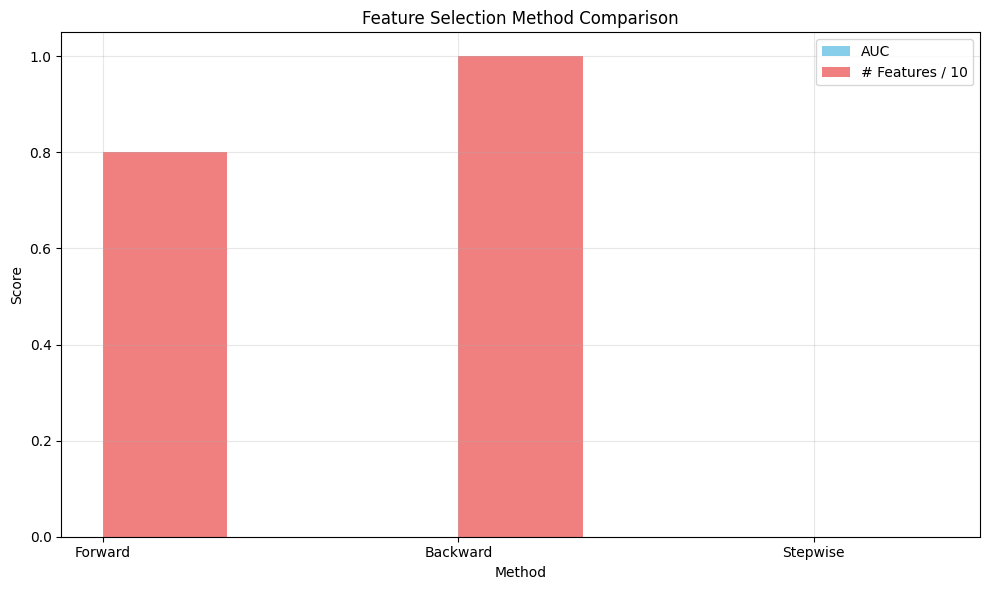


Summary:
  Forward     : AUC=nan, Features=8
  Backward    : AUC=nan, Features=10
  Stepwise    : AUC=0.000, Features=0


In [6]:
# Compare results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

methods = ['Forward', 'Backward', 'Stepwise']
aucs = [forward.best_score_, backward.best_score_, stepwise.best_score_]
n_features = [
    len(forward.get_selected_features()),
    len(backward.get_selected_features()),
    len(stepwise.get_selected_features())
]

x = np.arange(len(methods))
width = 0.35

ax.bar(x - width/2, aucs, width, label='AUC', color='skyblue')
ax.bar(x + width/2, [n/10 for n in n_features], width, 
       label='# Features / 10', color='lightcoral')

ax.set_xlabel('Method')
ax.set_ylabel('Score')
ax.set_title('Feature Selection Method Comparison')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSummary:")
for method, auc, n_feat in zip(methods, aucs, n_features):
    print(f"  {method:12s}: AUC={auc:.3f}, Features={n_feat}")

## Summary

You learned how to:
- Apply forward selection (greedy addition)
- Apply backward elimination (greedy removal)
- Apply stepwise selection (bidirectional)
- Compare different methods

**Next:** Playbook 03 for visualization and reporting!